In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { //This functions disables the scroll
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#Imports
import os
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plot
import matplotlib.dates as md
import numpy as np
from dateutil import tz #Used to get time zone


In [3]:
#Constants
TIME_ZONE = tz.gettz('US/Eastern');
SENSOR_DATA_DIR = 'sensor_data'
NO_OF_DIRECTORIES_TO_READ = -1 #-1 will go for all directories except last one

#Dictionary Containting Sensors Constants
dict_vars = {'TEMP': {'filename':'TEMP.csv', 'names':['TEMP'], 'min':24.0, 'max':43.0,'gap':0.24}, # names, min, max
              'IBI':{'filename':'IBI.csv', 'names':['IBI'], 'min':0.6, 'max':1.26},# Experimental
              'HR': {'filename':'HR.csv', 'names':['HR'], 'min':35.0, 'max':200.0},# Experimental
              'EDA':{'filename':'EDA.csv', 'names':['EDA'], 'min':1.0, 'max':20.0},# GSR
              'BVP':{'filename':'BVP.csv', 'names':['BVP'], 'min':35.0, 'max':200.0},#Experimental
              'ACC':{'filename':'ACC.csv', 'names':['ACC_x','ACC_y','ACC_z'], 'min':None, 'max':None}
             }

#Configurations
plot.rcParams['figure.figsize'] = [15, 5]

#Lambdas
TIME_FORMAT = '%H:%M:%S'
lambda_str_to_date_string = lambda ts: datetime.fromtimestamp(ts, tz = TIME_ZONE).strftime('%y-%m-%d')
lambda_str_to_time_string = lambda ts: datetime.fromtimestamp(ts, tz = TIME_ZONE).strftime(TIME_FORMAT)


In [4]:
#Getting the directories
def get_list_of_folder_names_inside_dir(dir_name):
    """
    Returns the list of paths of folders in side the provided directory
    
    Keyword arguments:
    dir_name -- the name of the folder to find paths in.
    """
    folder_name_list=[]
    for root, dirs, files in os.walk(dir_name):
        folder_name_list.append(root)
        #print(root, end="\n")
        #print(sum(getsize(join(root, name)) for name in files), end=" ")
        #print("bytes in", len(files), "non-directory files")
    return folder_name_list[1:] #Returning names except root directory

#Getting Sensor Data Folders
sensor_data_folders_name_list = get_list_of_folder_names_inside_dir(SENSOR_DATA_DIR)
print("Number of folders: ",len(sensor_data_folders_name_list), end = '\n')
print("Displaying names of Folders:\n")
print(sensor_data_folders_name_list)

Number of folders:  103
Displaying names of Folders:

['sensor_data\\A010e9_170413-003439', 'sensor_data\\A010e9_170417-154337', 'sensor_data\\A010e9_170420-130630', 'sensor_data\\A010e9_170421-001318', 'sensor_data\\A010e9_170421-133357', 'sensor_data\\A010e9_170422-121529', 'sensor_data\\A010e9_170422-172924', 'sensor_data\\A010e9_170423-024315', 'sensor_data\\A010e9_170423-151800', 'sensor_data\\A010e9_170423-215035', 'sensor_data\\A010e9_170424-013505', 'sensor_data\\A010e9_170425-153257', 'sensor_data\\A010e9_170425-170627', 'sensor_data\\A010e9_170426-033400', 'sensor_data\\A010e9_170427-023310', 'sensor_data\\A010e9_170428-140616', 'sensor_data\\A010e9_170428-175123', 'sensor_data\\A010e9_170429-115559', 'sensor_data\\A010e9_170501-133356', 'sensor_data\\A010e9_170502-131606', 'sensor_data\\A010e9_170505-133418', 'sensor_data\\A010e9_170510-020112', 'sensor_data\\A01119_170412-152301', 'sensor_data\\A01119_170422-144412', 'sensor_data\\A0111b_170405-145139', 'sensor_data\\A0111b

In [5]:
#Reading Temperature Data from Directories
def get_indexed_dataframe_from_file(dir_name, dict_var):
     df_temp = pd.read_csv(dir_name + "/" + dict_var['filename'], names = dict_var['names'])#Reading one directory file
     initial_time = df_temp.iloc[0][0] #Getting initial time from file
     frequency = df_temp.iloc[1][0] #Getting frequency
     delta_time = 1/frequency #Converting frequency to time seconds

     print("File name: ", dir_name, "/", dict_var['filename'],", Initial Time: ",initial_time, ", Frequency: ",frequency,
           ", No of Rows: ",df_temp.shape[0])
     df_temp.drop([0,1],inplace = True) #Deleting Initial time and frequency

     time_column = [initial_time + (row_id * delta_time) for row_id in range( df_temp.shape[0])] # init + Δtime * row 
     #print(time_column)
     df_temp.insert(loc = 0 ,column = 'time_stamp', value = time_column) #inserting time column
        
#     time_column = df_temp['time_stamp'].apply(np.floor) # init + Δtime * row 
#     df_temp.insert(loc = 1 ,column = 'time_stamp_cieled', value = time_column) #inserting time column
     
     df_temp.set_index('time_stamp') # Setting timestamp as index
     return df_temp

def get_all_data(dict_var):
#    print("Reading All Files:", dict_var,"\n")
    df_merged = pd.DataFrame() #Creating empty dataframe
    for dir_name in sensor_data_folders_name_list[ 0 : NO_OF_DIRECTORIES_TO_READ ]:
#        print("Reading: ",dir_name)
        df_merged = pd.concat([df_merged, get_indexed_dataframe_from_file(dir_name,dict_var)])
    return df_merged

# Temperature

In [6]:
#Reading Temperature Data
df_temperature = get_all_data(dict_vars['TEMP'])
df_temperature.reset_index(inplace=True,drop=True)
print("\nInitially Data Size: " , df_temperature.shape)

File name:  sensor_data\A010e9_170413-003439 / TEMP.csv , Initial Time:  1492043679.0 , Frequency:  4.0 , No of Rows:  325826
File name:  sensor_data\A010e9_170417-154337 / TEMP.csv , Initial Time:  1492443817.0 , Frequency:  4.0 , No of Rows:  1954
File name:  sensor_data\A010e9_170420-130630 / TEMP.csv , Initial Time:  1492693590.0 , Frequency:  4.0 , No of Rows:  1346
File name:  sensor_data\A010e9_170421-001318 / TEMP.csv , Initial Time:  1492733598.0 , Frequency:  4.0 , No of Rows:  162274
File name:  sensor_data\A010e9_170421-133357 / TEMP.csv , Initial Time:  1492781637.0 , Frequency:  4.0 , No of Rows:  320730
File name:  sensor_data\A010e9_170422-121529 / TEMP.csv , Initial Time:  1492863329.0 , Frequency:  4.0 , No of Rows:  75058
File name:  sensor_data\A010e9_170422-172924 / TEMP.csv , Initial Time:  1492882164.0 , Frequency:  4.0 , No of Rows:  132634
File name:  sensor_data\A010e9_170423-024315 / TEMP.csv , Initial Time:  1492915395.0 , Frequency:  4.0 , No of Rows:  1808

File name:  sensor_data\A012ce_170420-114354 / TEMP.csv , Initial Time:  1492688634.0 , Frequency:  4.0 , No of Rows:  236962
File name:  sensor_data\A012ce_170421-041235 / TEMP.csv , Initial Time:  1492747955.0 , Frequency:  4.0 , No of Rows:  330330
File name:  sensor_data\A012ce_170422-122454 / TEMP.csv , Initial Time:  1492863894.0 , Frequency:  4.0 , No of Rows:  520114
File name:  sensor_data\A012ce_170424-010522 / TEMP.csv , Initial Time:  1492995922.0 , Frequency:  4.0 , No of Rows:  475370
File name:  sensor_data\A012ce_170425-104408 / TEMP.csv , Initial Time:  1493117048.0 , Frequency:  4.0 , No of Rows:  386082
File name:  sensor_data\A012ce_170427-031805 / TEMP.csv , Initial Time:  1493263085.0 , Frequency:  4.0 , No of Rows:  734234
File name:  sensor_data\A012ce_170429-152714 / TEMP.csv , Initial Time:  1493479634.0 , Frequency:  4.0 , No of Rows:  141730
File name:  sensor_data\A012ce_170430-143057 / TEMP.csv , Initial Time:  1493562657.0 , Frequency:  4.0 , No of Rows: 

In [7]:
#Visualizing Temperature Data
print("\n\n Displaying 10 heads\n")
df_temperature.head(10)



 Displaying 10 heads



,time_stamp,TEMP
0,1.492044e+09,382.18
1,1.492044e+09,382.18
2,1.492044e+09,382.18
3,1.492044e+09,382.18
4,1.492044e+09,33.87
5,1.492044e+09,33.87
6,1.492044e+09,33.87
7,1.492044e+09,33.87
8,1.492044e+09,33.89
9,1.492044e+09,33.89


In [105]:
#As we can see that data is having repeated values so we delete the values which are same contegiously

# ids = []
# for row_id in range(1, df_temperature.shape[0]):
#    if (df_temperature.iloc[row_id]['TEMP'] - df_temperature.iloc[row_id - 1]['TEMP']) == 0:
#        ids.append(row_id)
# df_temperature['match'] = df_temperature.TEMP.diff(df_temperature.TEMP.shift())
# df_temperature.drop(ids,axis = 0, inplace = True)
# df_temperature.drop(,axis = 0, inplace = True)
diff = abs(df_temperature['TEMP'].diff()) #Getting absolute difference between 
df_temp = df_temperature[diff >= dict_vars['TEMP']['gap']] #Removing values whose gap is greater than dict[gap]
df_temp = df_temp.append(df_temperature.iloc[0])#Appending 0 index as it is nan so not included
df_temp.sort_values('time_stamp',inplace=True)#Sorting by index time_stamp
df_temp.reset_index(inplace=True, drop=True)#Resetting indexes
print(df_temp.head(500))
df_temp.describe()

       time_stamp    TEMP
0    1.491404e+09  382.18
1    1.491404e+09   33.18
2    1.491406e+09   32.16
3    1.491407e+09   31.95
4    1.491408e+09   31.03
5    1.491410e+09   30.61
6    1.491410e+09   30.29
7    1.491410e+09   29.81
8    1.491410e+09   29.69
9    1.491410e+09   30.01
10   1.491410e+09   30.05
11   1.491410e+09   29.75
12   1.491410e+09   30.23
13   1.491410e+09   29.81
14   1.491410e+09   29.65
15   1.491410e+09   29.31
16   1.491410e+09   29.49
17   1.491410e+09   29.17
18   1.491412e+09   25.89
19   1.491412e+09   24.21
20   1.491412e+09   24.95
21   1.491412e+09   24.51
22   1.491418e+09   20.69
23   1.491418e+09   20.29
24   1.491418e+09   20.85
25   1.491418e+09   20.57
26   1.491418e+09   20.12
27   1.491418e+09   20.57
28   1.491418e+09   19.53
29   1.491418e+09   20.65
..            ...     ...
470  1.492490e+09   34.83
471  1.492493e+09   34.23
472  1.492493e+09   34.61
473  1.492494e+09   34.43
474  1.492512e+09   32.89
475  1.492512e+09   29.29
476  1.49251

,time_stamp,TEMP
count,1.081600e+04,10816.000000
mean,1.495946e+09,33.731861
std,2.180174e+06,34.160074
min,1.491404e+09,14.070000
25%,1.494104e+09,28.570000
50%,1.496278e+09,31.010000
75%,1.497739e+09,32.840000
max,1.500599e+09,382.210000


Number of Rows in Temperature:  10816


,time_stamp,TEMP
count,3.273392e+07,3.273392e+07
mean,1.495503e+09,3.174844e+01
std,2.349494e+06,4.882491e+00
min,1.491404e+09,1.203000e+01
25%,1.493329e+09,3.077000e+01
50%,1.495350e+09,3.365000e+01
75%,1.497788e+09,3.493000e+01
max,1.500599e+09,3.822100e+02


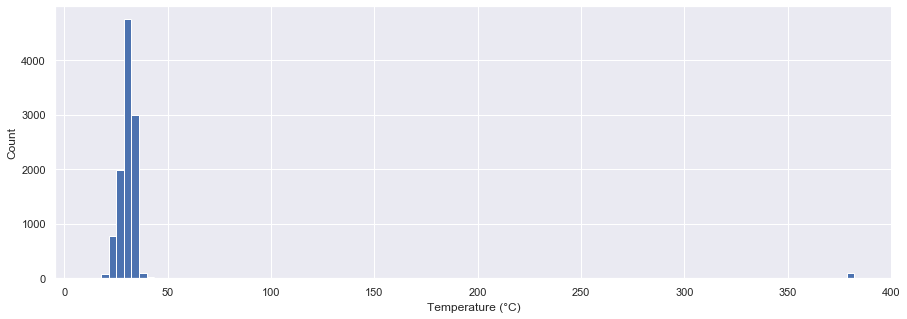

In [106]:
#Checking the frequencies of the data to see different patterns e.g. maximum number of same values, outliers
from collections import Counter

def display_frequency_bar_chart(value_list,xlabel,ylabel, bins = 100):
    plot.hist(value_list,bins = bins)
    plot.ylabel(ylabel)
    plot.xlabel(xlabel)
       
print("Number of Rows in Temperature: ",df_temp.shape[0])
display_frequency_bar_chart(df_temp['TEMP'],"Temperature (°C)","Count")
#df_temp['TEMP'][0:1000].value_counts().plot.bar()
df_temperature.describe()
#df_temp['TEMP'][0:1000]

Keeping Values between:  24.0  and  43.0


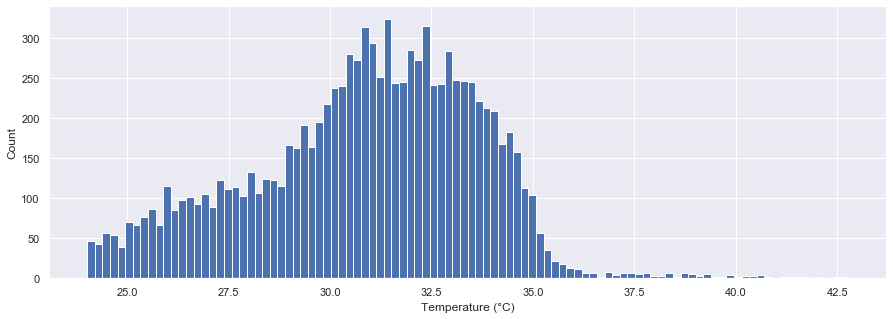

,time_stamp,TEMP
1,1.491404e+09,33.18
2,1.491406e+09,32.16
3,1.491407e+09,31.95
4,1.491408e+09,31.03
5,1.491410e+09,30.61


In [107]:
#Deleting outliers
print("Keeping Values between: ",dict_vars['TEMP']['min']," and ",dict_vars['TEMP']['max'])
df_temp = df_temp[(df_temp.TEMP >= dict_vars['TEMP']['min']) &
                                (df_temp.TEMP <= dict_vars['TEMP']['max'])] #Only keeping values lower than 200
display_frequency_bar_chart(df_temp['TEMP'],"Temperature (°C)","Count")
plot.show()
df_temp.describe()
df_temp.head()

,time_stamp,TEMP,date,time
1,1.491404e+09,33.18,17-04-05,20:21:40
2,1.491406e+09,32.16,17-04-05,20:52:43
3,1.491407e+09,31.95,17-04-05,21:08:03
4,1.491408e+09,31.03,17-04-05,21:24:13
5,1.491410e+09,30.61,17-04-05,21:58:44


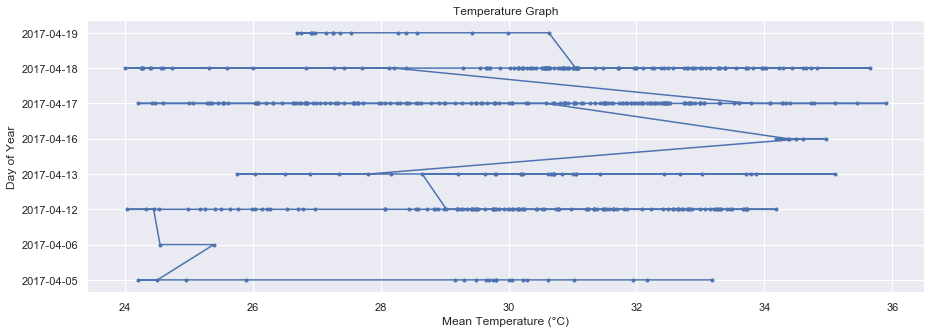

In [108]:

#Displaying Temperature and time graph

READINGS_TO_SHOW = 500 #-1 to display all data except last entry
f_utc2ts_naive = lambda t: datetime.timestamp(datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))
def plot_temperature(list_timestamp, temps):
    fig = plot.figure()
    plot.title('Temperature Graph')
    plot.xlabel('Mean Temperature (°C)')
    plot.ylabel('Day of Year') 
    ax = plot.gca()
    formatted_timestamp = list_timestamp
    formatted_timestamp = [datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d') for timestamp in list_timestamp]# %H:%M:%S
    plot.plot(temps[0:READINGS_TO_SHOW], formatted_timestamp[0:READINGS_TO_SHOW], marker='.')
    return fig

# for time_stamp in df_temp['time_stamp']:
#     df_temp['datetime']= datetime.fromtimestamp(time_stamp)
plot_temperature(df_temp['time_stamp'].values,df_temp['TEMP'])
a=10

df_temp.sort_values('time_stamp',inplace=True)#Sorting by index time_stamp
df_temp['date'] = df_temp['time_stamp'].map(lambda_str_to_date_string)
df_temp['time'] = df_temp['time_stamp'].map(lambda_str_to_time_string)
#df_temp['TEMP'].head()
df_temp.head(5)


In [109]:
#make date time columns seperately
import datetime as dt
import pytz
import pandas as pd

date_time_str = '2018-06-29 17:08:00'
date_time_obj = dt.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

# timezone = pytz.timezone('America/New_York')
# timezone_date_time_obj = timezone.localize(date_time_obj)

# print(timezone_date_time_obj)
# print(timezone_date_time_obj.tzinfo)
dateList = []
TimeList=[]
dateandtimeList=[]
averagetemplist=[]
# finaldate = dt.datetime.today()
i=0
for date,time in zip(df_temp.date, df_temp.time): 
    dateList.append(dt.datetime.strptime(date +" "+time, '%y-%m-%d %H:%M:%S').date())
    TimeList.append(dt.datetime.strptime(date +" "+time, '%y-%m-%d %H:%M:%S').time())
    dateandtimeList.append(dt.datetime.strptime(date +" "+time, '%y-%m-%d %H:%M:%S'))
    i=i+1
count=0
for date in df_temp.date: 
    count=count+1
    df = df_temp[df_temp.date == date]
    averagetemplist.append(df['TEMP'].mean())
    
df_temp['mean_total']=df_temp['TEMP'].mean()
df_temp['averagedaytemp']=averagetemplist
df_temp['datess']=dateList
df_temp['NewTime']=TimeList
df_temp['DatenTime']=dateandtimeList

    
# df12=df_temp[['DatenTime','TEMP']]

# Convert the data to daily frequency, without filling any missings
# df12['DatenTime'] = df12['DatenTime'].asfreq('H')
# # Create a column with missings forward filled
# df12['forward filll'] = df12.asfreq('H', method='ffill')
# df12.head()

df_temp.head()


,time_stamp,TEMP,date,time,mean_total,averagedaytemp,datess,NewTime,DatenTime
1,1.491404e+09,33.18,17-04-05,20:21:40,30.846827,29.321429,2017-04-05,20:21:40,2017-04-05 20:21:40
2,1.491406e+09,32.16,17-04-05,20:52:43,30.846827,29.321429,2017-04-05,20:52:43,2017-04-05 20:52:43
3,1.491407e+09,31.95,17-04-05,21:08:03,30.846827,29.321429,2017-04-05,21:08:03,2017-04-05 21:08:03
4,1.491408e+09,31.03,17-04-05,21:24:13,30.846827,29.321429,2017-04-05,21:24:13,2017-04-05 21:24:13
5,1.491410e+09,30.61,17-04-05,21:58:44,30.846827,29.321429,2017-04-05,21:58:44,2017-04-05 21:58:44


2017-04-06


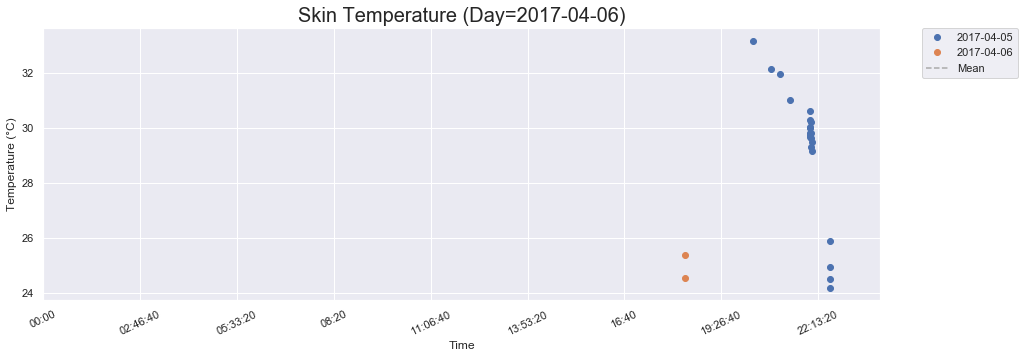

In [111]:
#daily with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
# sns.set(style="darkgrid")
df_sub = df_temp[['datess','NewTime','TEMP','mean_total','averagedaytemp']]

df_sub.sort_values(by='datess')
df_sub.head()
all_dates = set(df_sub['datess'])#Getting all dates
all_detes=sorted(all_dates)
all_date_list = list(sorted(all_dates))

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in all_date_list:
    df = df_sub[df_sub.datess == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['TEMP'],'o',label=date)
    i=i+1   
    if i % 1==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
#         datenums=md.date2num(date)
        plt.xticks( rotation=25 )
        ax=plt.gca()
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("Skin Temperature (Day="+str(date)+")",fontsize=20)
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('Temperature (°C)')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
        fig.tight_layout()
#         plt.savefig("daily_temperature/Date="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        break   #remove this to generate plots for all dates








2017-04-18


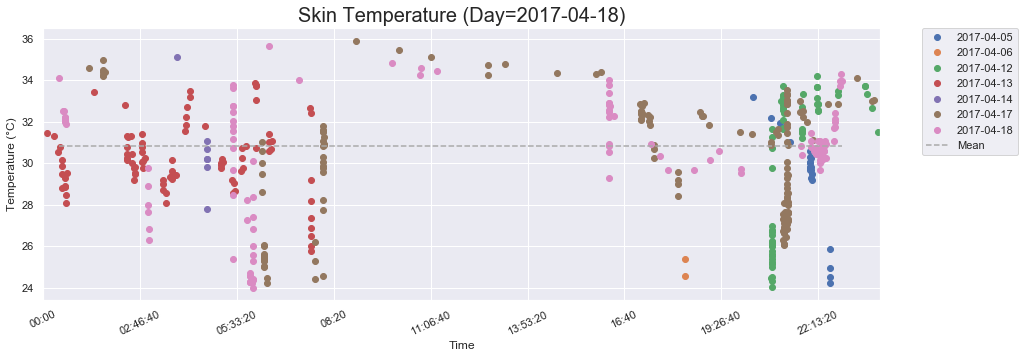

2017-04-25


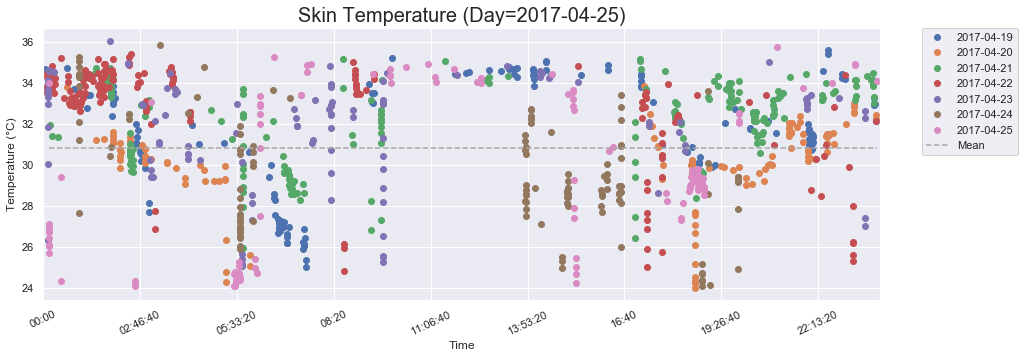

2017-05-02


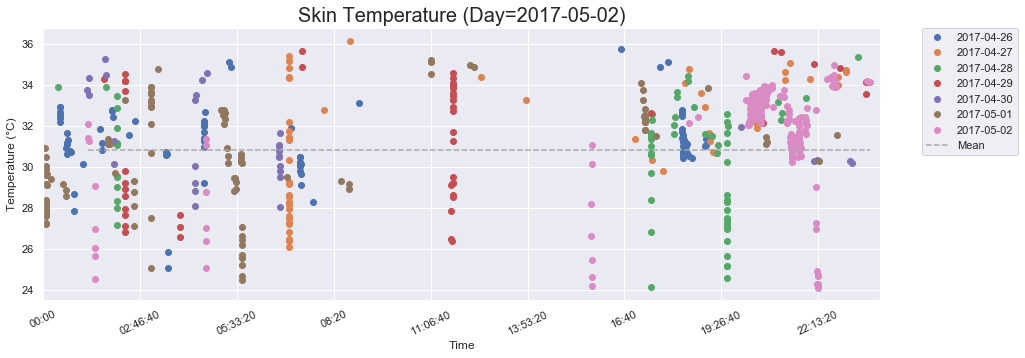

2017-05-09


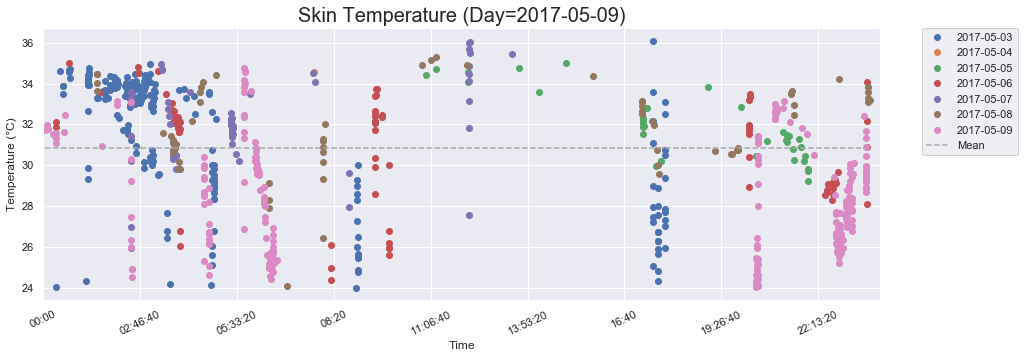

2017-05-16


KeyboardInterrupt: 

In [116]:
#Weekly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
# sns.set(style="darkgrid")
df_sub = df_temp[['datess','NewTime','TEMP','mean_total','averagedaytemp']]

df_sub.sort_values(by='datess')
df_sub.head()
all_dates = set(df_sub['datess'])#Getting all dates
all_detes=sorted(all_dates)
all_date_list = list(sorted(all_dates))

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in all_date_list:
    df = df_sub[df_sub.datess == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['TEMP'],'o',label=date)
    i=i+1   
    if i % 7==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
        plt.xticks( rotation=25 )
        ax=plt.gca()
#         xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#         ax.xaxis.set_major_formatter(xfmt)
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("Skin Temperature (Day="+str(date)+")",fontsize=20)
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('Temperature (°C)')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
#         fig.tight_layout()
#         fig.savefig('test.pdf')
#         plt.savefig("weekly_temperature/Date="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  

2017-05-14


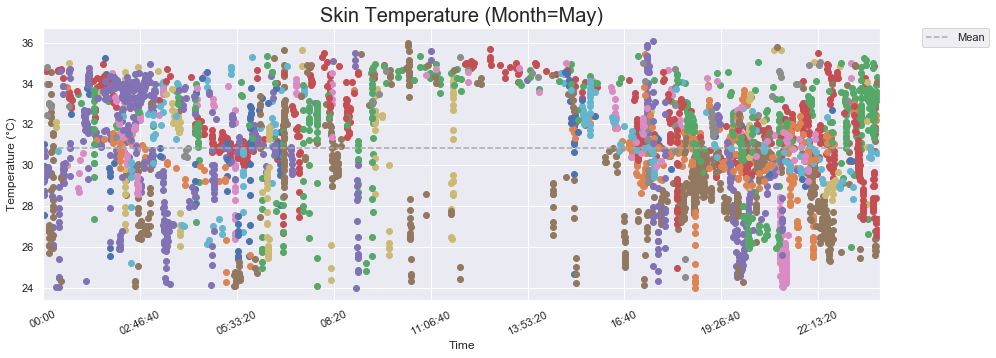

2017-04-22


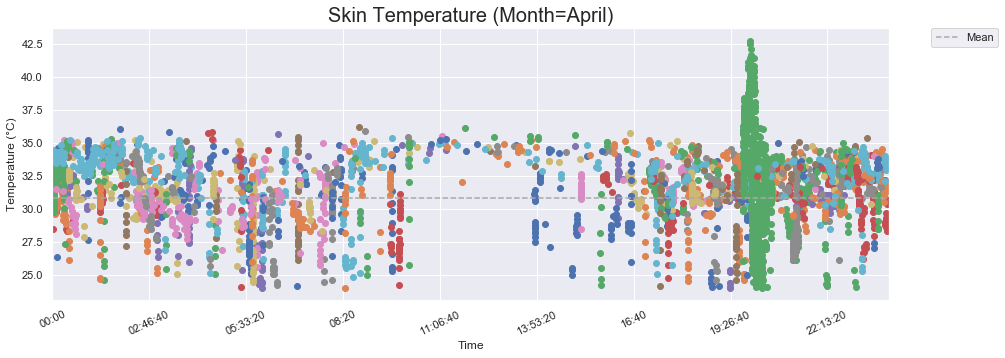

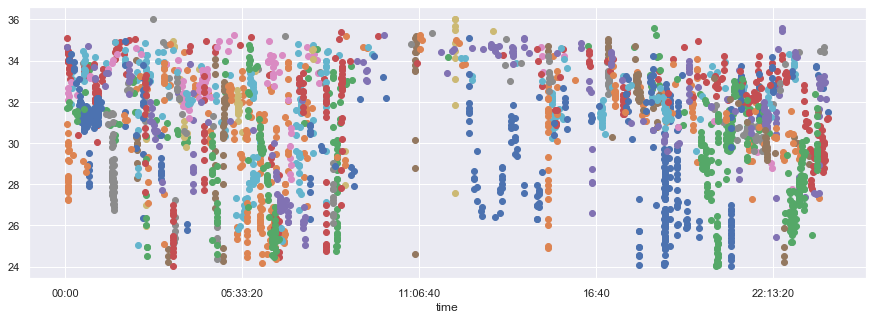

In [119]:
#Monthly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
# sns.set(style="darkgrid")
df_sub = df_temp[['datess','NewTime','TEMP','mean_total','averagedaytemp']]

df_sub.sort_values(by='datess')
df_sub.head()
all_dates = set(df_sub['datess'])#Getting all dates
all_detes=sorted(all_dates) #sorting them
all_date_list = list(sorted(all_dates)) # putting in a list

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in all_date_list:
    df = df_sub[df_sub.datess == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['TEMP'],'o')
    i=i+1   
    if i % 30==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
#         datenums=md.date2num(date)
        plt.xticks( rotation=25 )
        ax=plt.gca()
#         xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#         ax.xaxis.set_major_formatter(xfmt)
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("Skin Temperature (Month="+str(date.strftime("%B"))+")",fontsize=20)
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('Temperature (°C)')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
#         fig.tight_layout()
#         fig.savefig('test.pdf')
#         plt.savefig("monthly_temperature/Date="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  


# EDA(Electrodermal Activity)

In [75]:
#Reading Electrodermal Activity Data
df_eda = get_all_data(dict_vars['EDA'])
df_eda.reset_index(inplace=True,drop=True)

File name:  sensor_data\A010e9_170413-003439 / EDA.csv , Initial Time:  1492043679.0 , Frequency:  4.0 , No of Rows:  325832
File name:  sensor_data\A010e9_170417-154337 / EDA.csv , Initial Time:  1492443817.0 , Frequency:  4.0 , No of Rows:  1958
File name:  sensor_data\A010e9_170420-130630 / EDA.csv , Initial Time:  1492693590.0 , Frequency:  4.0 , No of Rows:  1346
File name:  sensor_data\A010e9_170421-001318 / EDA.csv , Initial Time:  1492733598.0 , Frequency:  4.0 , No of Rows:  162272
File name:  sensor_data\A010e9_170421-133357 / EDA.csv , Initial Time:  1492781637.0 , Frequency:  4.0 , No of Rows:  320738
File name:  sensor_data\A010e9_170422-121529 / EDA.csv , Initial Time:  1492863329.0 , Frequency:  4.0 , No of Rows:  75056
File name:  sensor_data\A010e9_170422-172924 / EDA.csv , Initial Time:  1492882164.0 , Frequency:  4.0 , No of Rows:  132638
File name:  sensor_data\A010e9_170423-024315 / EDA.csv , Initial Time:  1492915395.0 , Frequency:  4.0 , No of Rows:  180842
File 

File name:  sensor_data\A012ce_170420-114354 / EDA.csv , Initial Time:  1492688634.0 , Frequency:  4.0 , No of Rows:  236966
File name:  sensor_data\A012ce_170421-041235 / EDA.csv , Initial Time:  1492747955.0 , Frequency:  4.0 , No of Rows:  330332
File name:  sensor_data\A012ce_170422-122454 / EDA.csv , Initial Time:  1492863894.0 , Frequency:  4.0 , No of Rows:  520112
File name:  sensor_data\A012ce_170424-010522 / EDA.csv , Initial Time:  1492995922.0 , Frequency:  4.0 , No of Rows:  475370
File name:  sensor_data\A012ce_170425-104408 / EDA.csv , Initial Time:  1493117048.0 , Frequency:  4.0 , No of Rows:  386084
File name:  sensor_data\A012ce_170427-031805 / EDA.csv , Initial Time:  1493263085.0 , Frequency:  4.0 , No of Rows:  734240
File name:  sensor_data\A012ce_170429-152714 / EDA.csv , Initial Time:  1493479634.0 , Frequency:  4.0 , No of Rows:  141728
File name:  sensor_data\A012ce_170430-143057 / EDA.csv , Initial Time:  1493562657.0 , Frequency:  4.0 , No of Rows:  139688


In [76]:
#Decribing Content of EDA
print("\nInitially Data Size: " , df_temperature.shape,"\n")
print("Diplaying top 10 values: ")
print(df_eda.head(10))
df_eda.describe()




Initially Data Size:  (32733920, 2) 

Diplaying top 10 values: 
     time_stamp       EDA
0  1.492044e+09  0.000000
1  1.492044e+09  0.540559
2  1.492044e+09  0.713487
3  1.492044e+09  1.080104
4  1.492044e+09  0.626718
5  1.492044e+09  0.679237
6  1.492044e+09  0.680518
7  1.492044e+09  0.658742
8  1.492044e+09  0.695889
9  1.492044e+09  0.709980


,time_stamp,EDA
count,3.273439e+07,3.273439e+07
mean,1.495503e+09,4.757900e-01
std,2.349490e+06,1.182335e+00
min,1.491404e+09,0.000000e+00
25%,1.493329e+09,2.049100e-02
50%,1.495350e+09,1.613510e-01
75%,1.497788e+09,5.147540e-01
max,1.500599e+09,6.002896e+01


In [77]:
#Deleting outliers
print("Keeping Values between: ",dict_vars['EDA']['min']," and ",dict_vars['EDA']['max'])
df_eda = df_eda[(df_eda.EDA >= dict_vars['EDA']['min']) &
                                (df_eda.EDA <= dict_vars['EDA']['max'])] #Only keeping values lower than 200

Keeping Values between:  1.0  and  20.0


Data Size after removing outliers(3331096, 4)


,time_stamp,EDA,date,time,mean_total,datess,NewTime,DatenTime
6511136,1.491404e+09,1.191116,17-04-05,20:21:39,2.491645,2017-04-05,20:21:39,2017-04-05 20:21:39
6511137,1.491404e+09,1.629110,17-04-05,20:21:39,2.491645,2017-04-05,20:21:39,2017-04-05 20:21:39
6511138,1.491404e+09,2.106829,17-04-05,20:21:40,2.491645,2017-04-05,20:21:40,2017-04-05 20:21:40
6511139,1.491404e+09,2.594893,17-04-05,20:21:40,2.491645,2017-04-05,20:21:40,2017-04-05 20:21:40
6511140,1.491404e+09,3.117440,17-04-05,20:21:40,2.491645,2017-04-05,20:21:40,2017-04-05 20:21:40


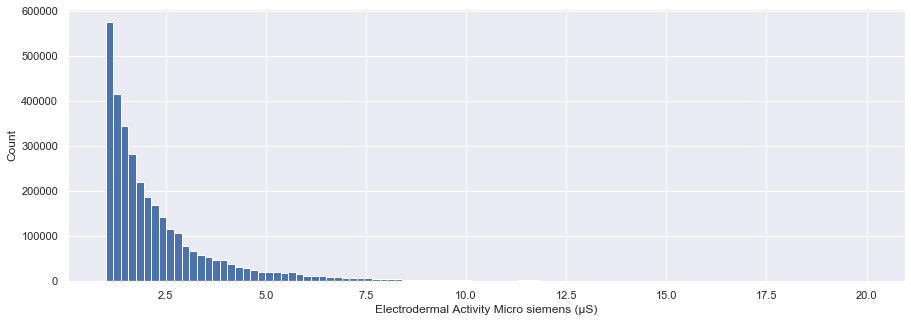

In [82]:
#Displaying Bar Graph of Count
display_frequency_bar_chart(df_eda['EDA'],"Electrodermal Activity Micro siemens (μS)","Count")
print("Data Size after removing outliers" + str(df_eda.shape))
df_eda.head()
f_utc2ts_naive = lambda t: datetime.timestamp(datetime.strptime(t, '%Y-%m-%d %I:%M:%S'))
df_eda.sort_values('time_stamp',inplace=True)#Sorting by index time_stamp
df_eda['date'] = df_eda['time_stamp'].map(lambda_str_to_date_string)
df_eda['time'] = df_eda['time_stamp'].map(lambda_str_to_time_string)

dateList_eda = []
TimeList_eda=[]
dateandtimeList_eda=[]

# finaldate = dt.datetime.today()
i=0
for date,time in zip(df_eda.date, df_eda.time): 
    dateList_eda.append(dt.datetime.strptime(date +" "+time, '%y-%m-%d %H:%M:%S').date())
    TimeList_eda.append(dt.datetime.strptime(date +" "+time, '%y-%m-%d %H:%M:%S').time())
    dateandtimeList_eda.append(dt.datetime.strptime(date +" "+time, '%y-%m-%d %H:%M:%S'))
df_eda['mean_total']=df_eda['EDA'].mean()
df_eda['datess']=dateList_eda
df_eda['NewTime']=TimeList_eda
df_eda['DatenTime']=dateandtimeList_eda
df_eda.head()
# df_temp.head()

2017-04-19


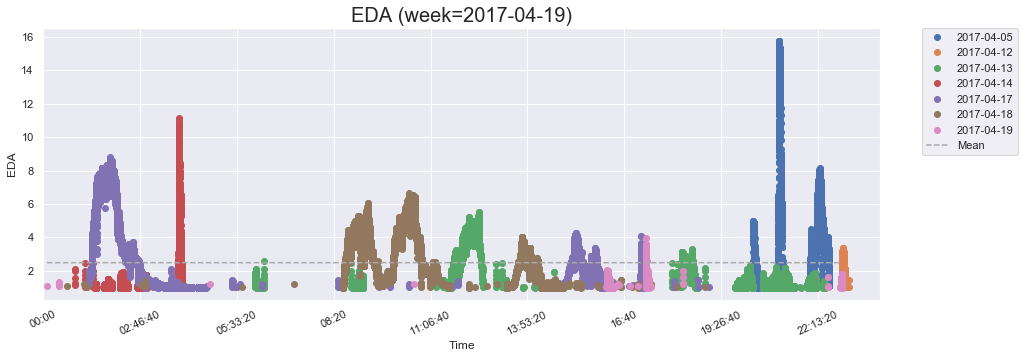

2017-04-26


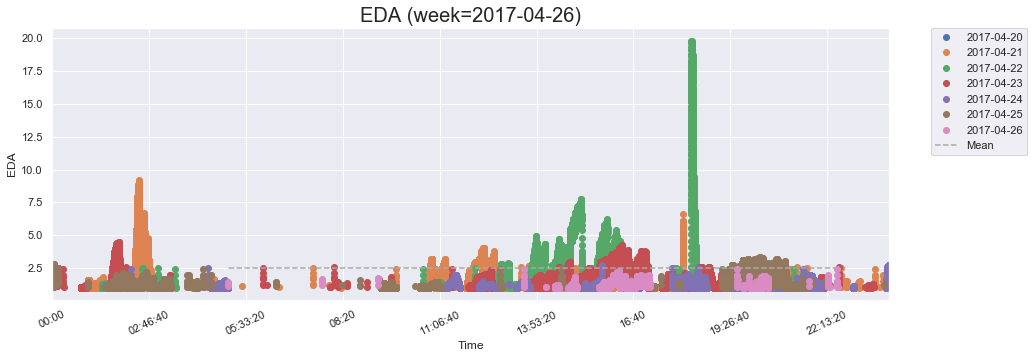

2017-05-03


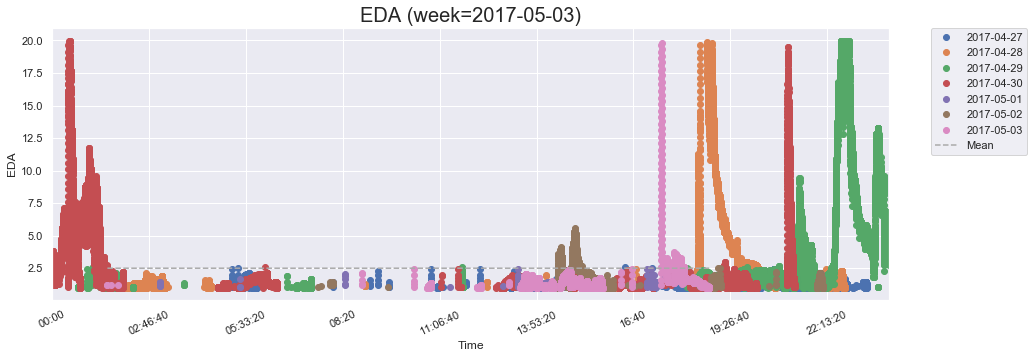

2017-05-10


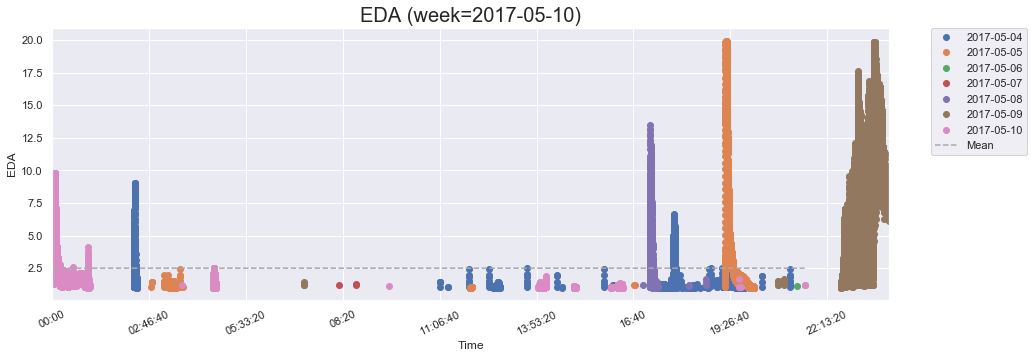

2017-05-17


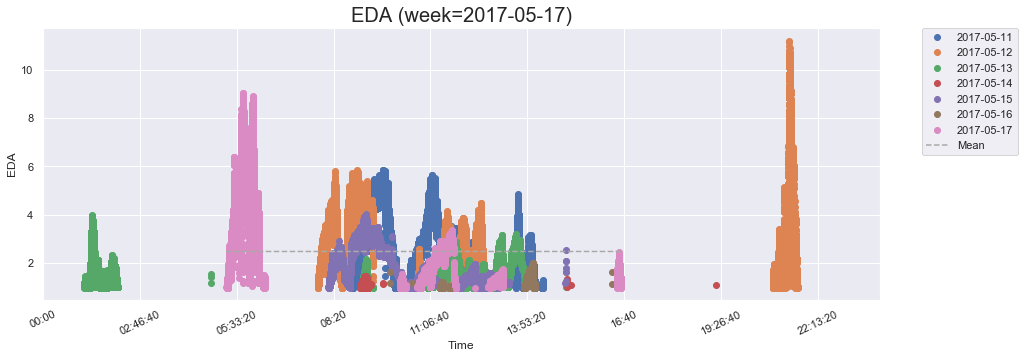

2017-05-25


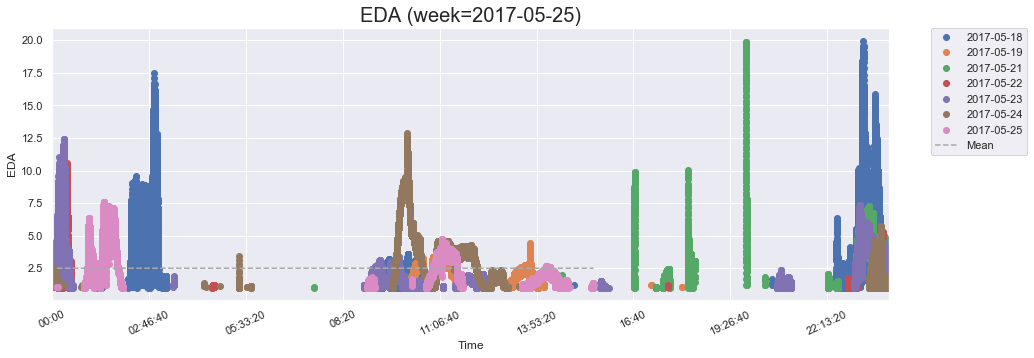

2017-06-06


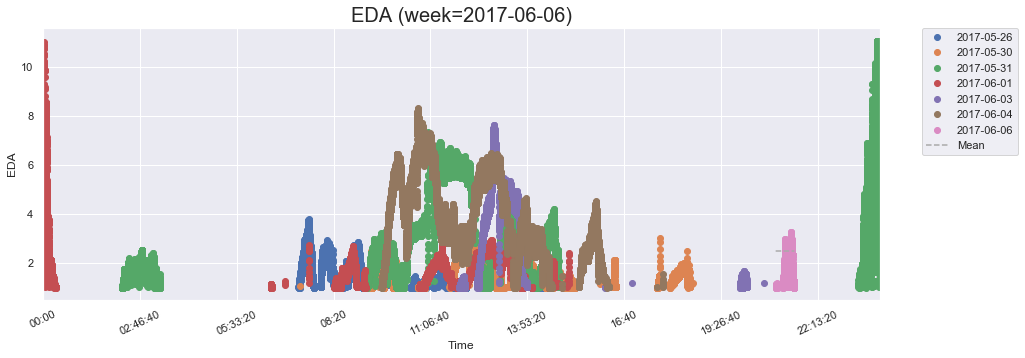

2017-06-13


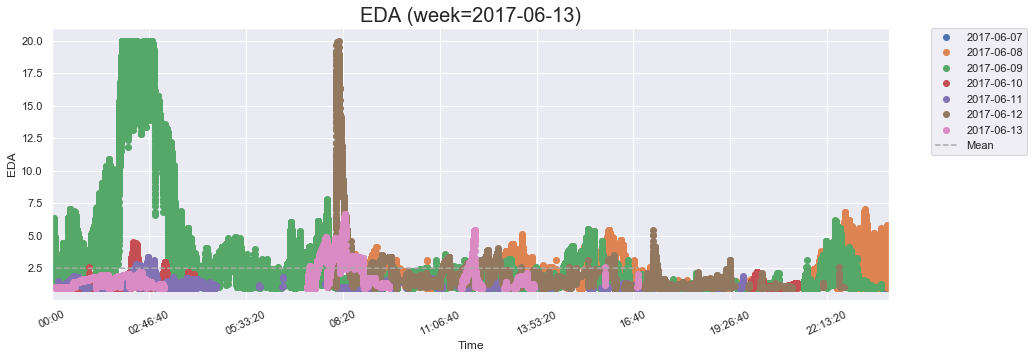

2017-06-20


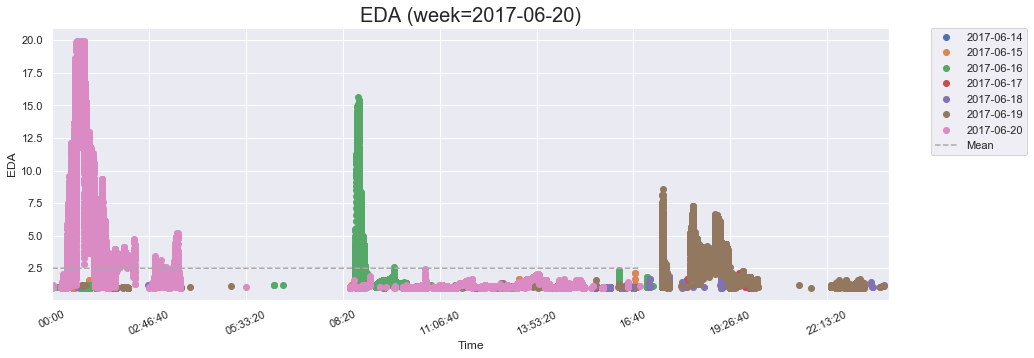

2017-06-27


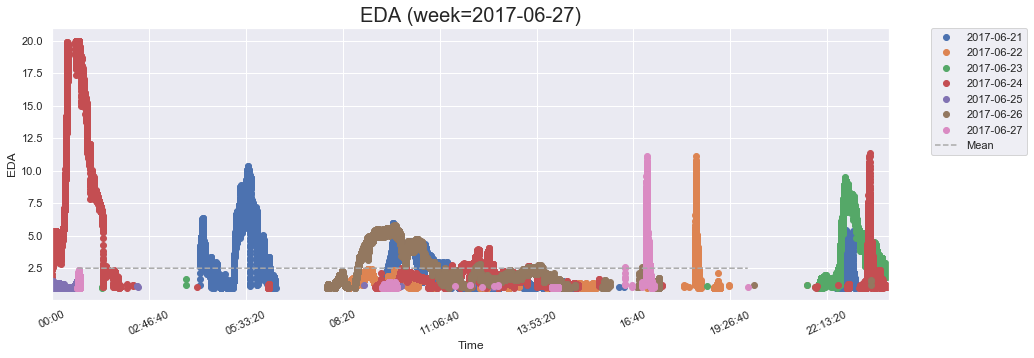

2017-07-04


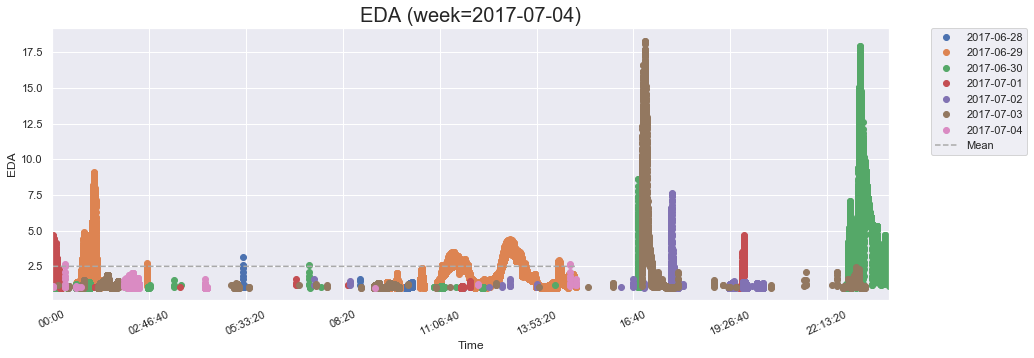

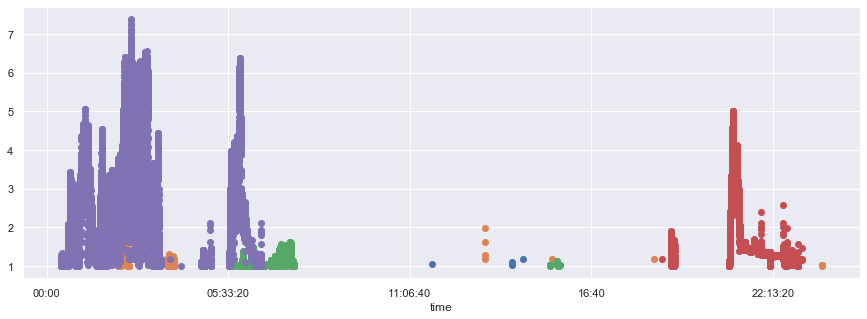

In [88]:
#Weekly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
# sns.set(style="darkgrid")
df_sub = df_eda[['datess','NewTime','EDA','mean_total']]

df_sub.sort_values(by='datess')
df_sub.head()
all_dates = set(df_sub['datess'])#Getting all dates
all_detes=sorted(all_dates)
all_date_list = list(sorted(all_dates))

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in all_date_list:
    df = df_sub[df_sub.datess == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['EDA'],'o')
    i=i+1   
    if i % 30==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
#         datenums=md.date2num(date)
        plt.xticks( rotation=25 )
        ax=plt.gca()
#         xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#         ax.xaxis.set_major_formatter(xfmt)
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("EDA (week="+str(date)+")",fontsize=20)
#         plt.title("Skin Temperature (Month="+str(date.strftime("%B"))+")",fontsize=20)
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('EDA')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
#         fig.tight_layout()
#         fig.savefig('test.pdf')
        plt.savefig("monthly_eda/="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        


In [ ]:


#monthly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
# sns.set(style="darkgrid")
df_sub = df_eda[['datess','NewTime','EDA','mean_total']]

df_sub.sort_values(by='datess')
df_sub.head()
all_dates = set(df_sub['datess'])#Getting all dates
all_detes=sorted(all_dates)
all_date_list = list(sorted(all_dates))

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in all_date_list:
    df = df_sub[df_sub.datess == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['EDA'],'o')
    i=i+1   
    if i % 30==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
#         datenums=md.date2num(date)
        plt.xticks( rotation=25 )
        ax=plt.gca()
#         xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#         ax.xaxis.set_major_formatter(xfmt)
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("EDA (month="+str(date.strftime("%B"))+")",fontsize=20)
#         plt.title("Skin Temperature (Month="+str(date.strftime("%B"))+")",fontsize=20)
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('EDA')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
#         fig.tight_layout()
#         fig.savefig('test.pdf')
        plt.savefig("monthly_eda/="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        


###### Daily EDA Plots

In [ ]:
# #daily with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
# sns.set(style="darkgrid")
df_sub = df_eda[['datess','NewTime','EDA','mean_total']]

df_sub.sort_values(by='datess')
df_sub.head()
all_dates = set(df_sub['datess'])#Getting all dates
all_detes=sorted(all_dates)
all_date_list = list(sorted(all_dates))

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in all_date_list:
    df = df_sub[df_sub.datess == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['EDA'],'o',c='red',label=str(date))
    i=i+1   
    if i % 1==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
#         datenums=md.date2num(date)
        plt.xticks( rotation=25 )
        ax=plt.gca()
#         xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#         ax.xaxis.set_major_formatter(xfmt)
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("EDA (Day="+str(date.strftime("%A"))+")",fontsize=20)
#         plt.title("Skin Temperature (Month="+str(date.strftime("%B"))+")",fontsize=20)
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('EDA')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
#         fig.tight_layout()
#         fig.savefig('test.pdf')
        plt.savefig("daily_eda/Date="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        


# Heart Rate

In [ ]:
# #Reading HR Data
# df_hr = get_all_data(dict_vars['HR'])
# df_hr.reset_index(inplace=True,drop=True)

In [ ]:
# #Decribing Content of HR
# print("\nInitially Data Size: " , df_hr.shape,"\n")
# print("Diplaying top 10 values: ")
# print(df_hr.head(10))
# df_hr.describe()

In [ ]:
# #Displaying Bar Graph of Count
# display_frequency_bar_chart(df_hr['HR'],"Heart Rate (Hz)","Count")
# print("Data Size" + str(df_hr.shape))
# df_hr.describe()

# BVP

In [ ]:
# #Reading BVP Data
# df_bvp = get_all_data(dict_vars['BVP'])
# df_bvp.reset_index(inplace=True,drop=True)

In [ ]:
# #Decribing Content of BVP
# print("\nInitially Data Size: " , df_bvp.shape,"\n")
# print("Diplaying top 10 values: ")
# print(df_bvp.head(10))
# df_bvp.describe()

In [ ]:
# #Displaying Bar Graph of Count
# display_frequency_bar_chart(df_hr['HR'],"Heart Rate (Hz)","Count")
# print("Data Size" + str(df_hr.shape))
# df_bvp.describe()

# Accelerometer

In [ ]:
# #Reading Accelerometer Data
# df_bvp = get_all_data(dict_vars['BVP'])
# df_bvp.reset_index(inplace=True,drop=True)